In [1]:
import scirpy as ir
import scanpy as sc
from glob import glob
import pandas as pd
import tarfile
import anndata
import warnings

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt, cm as mpl_cm
from cycler import cycler

sc.set_figure_params(figsize=(4, 4))
sc.settings.verbosity = 2  # verbosity: errors (0), warnings (1), info (2), hints (3)

In [2]:
######## BLOOD ###################################
adata_blood = sc.read_10x_mtx('C:/Users/mahim/Desktop/HiWi/Geneexpr_Matrix_Blood_P2/')
adata_tcr_blood = ir.io.read_10x_vdj('C:/Users/mahim/Desktop/HiWi/VDJ_Blood_P2/all_contig_annotations.json')

In [3]:
#merge
ir.pp.merge_with_ir(adata_blood, adata_tcr_blood)

... storing 'feature_types' as categorical


computing PCA
    with n_comps=50
    finished (0:00:10)
computing neighbors
    using 'X_pca' with n_pcs = 50
    finished (0:00:18)
computing UMAP
    finished (0:00:09)


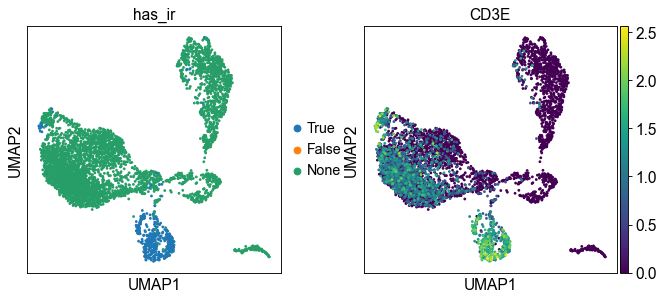

In [4]:
#Now, we can use TCR-related variables together with the gene expression data. 
#Here, we visualize the cells with a detected TCR on the UMAP plot. 
#It is reassuring that the TCRs coincide with the T-cell marker gene CD3.
sc.pp.log1p(adata_blood)
sc.pp.pca(adata_blood, svd_solver="arpack")
sc.pp.neighbors(adata_blood)
sc.tl.umap(adata_blood)
sc.pl.umap(adata_blood, color=["has_ir", "CD3E"])

In [5]:
#preprocessing the transcriptomics data
sc.pp.filter_genes(adata_blood, min_cells=10)
sc.pp.filter_cells(adata_blood, min_genes=100)

filtered out 20534 genes that are detected in less than 10 cells
filtered out 15 cells that have less than 100 genes expressed


In [6]:
#normalizing transcriptomics data
sc.pp.normalize_per_cell(adata_blood, counts_per_cell_after=1000)
sc.pp.log1p(adata_blood)

normalizing by total count per cell
    finished (0:00:00): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)


In [7]:
#TCR quality control
ir.tl.chain_qc(adata_blood)

In [8]:
adata_blood.obs['source'] = 'Blood'
adata_blood.obs['sample'] = 'P2B'
adata_blood.obs['patient'] = 'Blood'

In [9]:
adata_blood.obs

,multi_chain,extra_chains,is_cell,high_confidence,IR_VJ_1_c_call,IR_VJ_2_c_call,IR_VDJ_1_c_call,IR_VDJ_2_c_call,IR_VJ_1_consensus_count,IR_VJ_2_consensus_count,...,IR_VDJ_2_v_cigar,has_ir,n_genes,n_counts,receptor_type,receptor_subtype,chain_pairing,source,sample,patient
AAACCTGAGATCCCAT-1,None,NaN,None,None,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,None,988,956.366211,no IR,no IR,no IR,Blood,P2B,Blood
AAACCTGAGCGATCCC-1,None,NaN,None,None,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,None,1449,1468.661377,no IR,no IR,no IR,Blood,P2B,Blood
AAACCTGCACCAGGCT-1,None,NaN,None,None,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,None,1119,1035.697510,no IR,no IR,no IR,Blood,P2B,Blood
AAACCTGCAGGTGCCT-1,None,NaN,None,None,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,None,1234,1176.395752,no IR,no IR,no IR,Blood,P2B,Blood
AAACCTGCATAGACTC-1,None,NaN,None,None,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,None,1285,1235.878174,no IR,no IR,no IR,Blood,P2B,Blood
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCACATGGATGG-1,None,NaN,None,None,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,None,1594,1476.391113,no IR,no IR,no IR,Blood,P2B,Blood
TTTGTCAGTCTCATCC-1,None,NaN,None,None,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,None,1389,1319.245728,no IR,no IR,no IR,Blood,P2B,Blood
TTTGTCAGTGGTAACG-1,None,NaN,None,None,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,None,1554,1538.682617,no IR,no IR,no IR,Blood,P2B,Blood
TTTGTCAGTTGTCTTT-1,None,NaN,None,None,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,None,1143,1081.342041,no IR,no IR,no IR,Blood,P2B,Blood


In [10]:
###################### SKIN ##################################
adata_skin = sc.read_10x_mtx('C:/Users/mahim/Desktop/HiWi/Geneexpr_Matrix_Skin_P2/')
adata_tcr_skin = ir.io.read_10x_vdj('C:/Users/mahim/Desktop/HiWi/VDJ_Skin_P2/all_contig_annotations.json')

In [11]:
ir.pp.merge_with_ir(adata_skin, adata_tcr_skin)

... storing 'feature_types' as categorical


computing PCA
    with n_comps=50
    finished (0:00:04)
computing neighbors
    using 'X_pca' with n_pcs = 50
    finished (0:00:00)
computing UMAP
    finished (0:00:06)


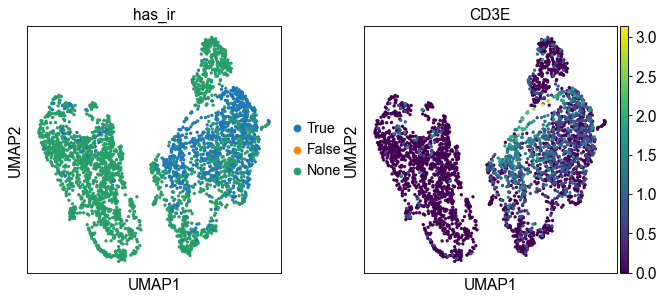

In [12]:
#Now, we can use TCR-related variables together with the gene expression data. 
#Here, we visualize the cells with a detected TCR on the UMAP plot. 
#It is reassuring that the TCRs coincide with the T-cell marker gene CD3.
sc.pp.log1p(adata_skin)
sc.pp.pca(adata_skin, svd_solver="arpack")
sc.pp.neighbors(adata_skin)
sc.tl.umap(adata_skin)
sc.pl.umap(adata_skin, color=["has_ir", "CD3E"])

In [13]:
#preprocessing the transcriptomics data
sc.pp.filter_genes(adata_skin, min_cells=10)
sc.pp.filter_cells(adata_skin, min_genes=100)

filtered out 20106 genes that are detected in less than 10 cells
filtered out 3 cells that have less than 100 genes expressed


In [14]:
#normalizing transcriptomics data
sc.pp.normalize_per_cell(adata_skin, counts_per_cell_after=1000)
sc.pp.log1p(adata_skin)

normalizing by total count per cell
    finished (0:00:00): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)


In [15]:
#TCR quality control
ir.tl.chain_qc(adata_skin)

In [16]:
adata_skin.obs['source'] = 'Skin'
adata_skin.obs['sample'] = 'P2S'
adata_skin.obs['patient'] = 'Skin'

In [17]:
adata_skin.obs

,multi_chain,extra_chains,is_cell,high_confidence,IR_VJ_1_c_call,IR_VJ_2_c_call,IR_VDJ_1_c_call,IR_VDJ_2_c_call,IR_VJ_1_consensus_count,IR_VJ_2_consensus_count,...,IR_VDJ_2_v_cigar,has_ir,n_genes,n_counts,receptor_type,receptor_subtype,chain_pairing,source,sample,patient
AAACCTGAGAGCAATT-1,None,NaN,None,None,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,None,1328,1334.127930,no IR,no IR,no IR,Skin,P2S,Skin
AAACCTGCATCGATTG-1,None,NaN,None,None,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,None,1667,1815.363770,no IR,no IR,no IR,Skin,P2S,Skin
AAACCTGGTTAAGTAG-1,None,NaN,None,None,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,None,738,826.240112,no IR,no IR,no IR,Skin,P2S,Skin
AAACCTGTCAGTTGAC-1,None,NaN,None,None,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,None,556,487.910431,no IR,no IR,no IR,Skin,P2S,Skin
AAACCTGTCCGCGCAA-1,False,"[{""c_call"": ""TRBC2"", ""consensus_count"": 15424,...",True,True,TRAC,NaN,TRBC1,NaN,4116.0,NaN,...,NaN,True,1784,1770.509277,TCR,TRA+TRB,single pair,Skin,P2S,Skin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCAAGGTGATAT-1,None,NaN,None,None,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,None,773,752.423584,no IR,no IR,no IR,Skin,P2S,Skin
TTTGTCACAGATCGGA-1,None,NaN,None,None,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,None,1388,1572.654907,no IR,no IR,no IR,Skin,P2S,Skin
TTTGTCACAGTCGTGC-1,None,NaN,None,None,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,None,625,551.459656,no IR,no IR,no IR,Skin,P2S,Skin
TTTGTCAGTCCTGCTT-1,None,NaN,None,None,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,None,1852,1950.377197,no IR,no IR,no IR,Skin,P2S,Skin


In [18]:
adata_blood.shape

(4731, 13004)

In [19]:
adata_skin.shape

(3322, 13432)

In [20]:
adata = adata_blood.concatenate(adata_skin)

In [21]:
adata.obs


,multi_chain,extra_chains,is_cell,high_confidence,IR_VJ_1_c_call,IR_VJ_2_c_call,IR_VDJ_1_c_call,IR_VDJ_2_c_call,IR_VJ_1_consensus_count,IR_VJ_2_consensus_count,...,has_ir,n_genes,n_counts,receptor_type,receptor_subtype,chain_pairing,source,sample,patient,batch
AAACCTGAGATCCCAT-1-0,None,NaN,None,None,NaN,NaN,NaN,NaN,NaN,NaN,...,None,988,956.366211,no IR,no IR,no IR,Blood,P2B,Blood,0
AAACCTGAGCGATCCC-1-0,None,NaN,None,None,NaN,NaN,NaN,NaN,NaN,NaN,...,None,1449,1468.661377,no IR,no IR,no IR,Blood,P2B,Blood,0
AAACCTGCACCAGGCT-1-0,None,NaN,None,None,NaN,NaN,NaN,NaN,NaN,NaN,...,None,1119,1035.697510,no IR,no IR,no IR,Blood,P2B,Blood,0
AAACCTGCAGGTGCCT-1-0,None,NaN,None,None,NaN,NaN,NaN,NaN,NaN,NaN,...,None,1234,1176.395752,no IR,no IR,no IR,Blood,P2B,Blood,0
AAACCTGCATAGACTC-1-0,None,NaN,None,None,NaN,NaN,NaN,NaN,NaN,NaN,...,None,1285,1235.878174,no IR,no IR,no IR,Blood,P2B,Blood,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCAAGGTGATAT-1-1,None,NaN,None,None,NaN,NaN,NaN,NaN,NaN,NaN,...,None,773,752.423584,no IR,no IR,no IR,Skin,P2S,Skin,1
TTTGTCACAGATCGGA-1-1,None,NaN,None,None,NaN,NaN,NaN,NaN,NaN,NaN,...,None,1388,1572.654907,no IR,no IR,no IR,Skin,P2S,Skin,1
TTTGTCACAGTCGTGC-1-1,None,NaN,None,None,NaN,NaN,NaN,NaN,NaN,NaN,...,None,625,551.459656,no IR,no IR,no IR,Skin,P2S,Skin,1
TTTGTCAGTCCTGCTT-1-1,None,NaN,None,None,NaN,NaN,NaN,NaN,NaN,NaN,...,None,1852,1950.377197,no IR,no IR,no IR,Skin,P2S,Skin,1


computing PCA
    with n_comps=50
    finished (0:00:13)
computing neighbors
    using 'X_pca' with n_pcs = 50
    finished (0:00:02)
computing UMAP
    finished (0:00:14)
... storing 'extra_chains' as categorical
... storing 'IR_VDJ_2_d_call' as categorical
... storing 'IR_VJ_2_j_call' as categorical
... storing 'IR_VDJ_2_j_call' as categorical
... storing 'IR_VJ_1_junction' as categorical
... storing 'IR_VJ_2_junction' as categorical
... storing 'IR_VDJ_1_junction' as categorical
... storing 'IR_VDJ_2_junction' as categorical
... storing 'IR_VJ_1_junction_aa' as categorical
... storing 'IR_VJ_2_junction_aa' as categorical
... storing 'IR_VDJ_1_junction_aa' as categorical
... storing 'IR_VDJ_2_junction_aa' as categorical
... storing 'IR_VJ_1_v_call' as categorical
... storing 'IR_VJ_2_v_call' as categorical
... storing 'IR_VDJ_1_v_call' as categorical
... storing 'IR_VDJ_2_v_call' as categorical
... storing 'receptor_type' as categorical
... storing 'receptor_subtype' as categorical
.

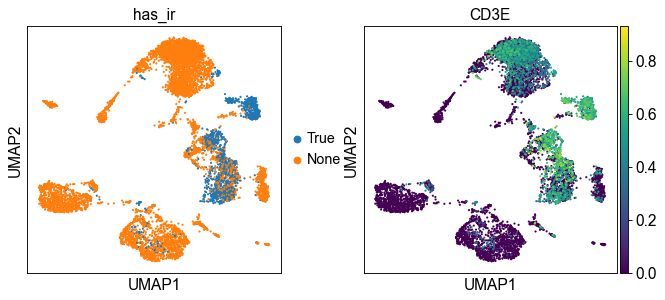

In [22]:
#UMAP
sc.pp.log1p(adata)
sc.pp.pca(adata, svd_solver="arpack")
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.pl.umap(adata, color=["has_ir", "CD3E"])

In [23]:
############################## successfully concatenated both datasets #########################
##############################START OF COMBINED ANALYSIS #######################################

In [24]:
#extract tcells into seperate object
tcells = adata[adata.obs["receptor_type"] == "TCR"]

In [25]:
tcells.obs

,multi_chain,extra_chains,is_cell,high_confidence,IR_VJ_1_c_call,IR_VJ_2_c_call,IR_VDJ_1_c_call,IR_VDJ_2_c_call,IR_VJ_1_consensus_count,IR_VJ_2_consensus_count,...,has_ir,n_genes,n_counts,receptor_type,receptor_subtype,chain_pairing,source,sample,patient,batch
AAACCTGTCATTTGGG-1-0,False,[],True,True,TRAC,NaN,TRBC2,NaN,4038.0,NaN,...,True,1412,1421.925049,TCR,TRA+TRB,single pair,Blood,P2B,Blood,0
AAAGCAATCACTTACT-1-0,False,[],True,True,TRAC,NaN,NaN,NaN,14566.0,NaN,...,True,3203,3318.053467,TCR,TRA+TRB,orphan VJ,Blood,P2B,Blood,0
AAAGCAATCGTCCAGG-1-0,False,"[{""c_call"": ""TRAC"", ""consensus_count"": 10982, ...",True,True,TRAC,NaN,TRBC2,NaN,12494.0,NaN,...,True,1271,1262.073486,TCR,TRA+TRB,single pair,Blood,P2B,Blood,0
AAATGCCCACGAGAGT-1-0,False,"[{""c_call"": ""TRAC"", ""consensus_count"": 15034, ...",True,True,NaN,NaN,TRBC1,NaN,NaN,NaN,...,True,1271,1304.905762,TCR,TRA+TRB,orphan VDJ,Blood,P2B,Blood,0
AACCATGAGTCGAGTG-1-0,False,"[{""c_call"": ""TRBC1"", ""consensus_count"": 22558,...",True,True,TRAC,NaN,TRBC1,NaN,18562.0,NaN,...,True,1306,1328.441162,TCR,TRA+TRB,single pair,Blood,P2B,Blood,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGCGCGTTCAGACT-1-1,False,[],True,True,TRAC,NaN,TRBC2,NaN,18792.0,NaN,...,True,1734,2012.114380,TCR,TRA+TRB,single pair,Skin,P2S,Skin,1
TTTGCGCTCAAAGACA-1-1,False,"[{""c_call"": ""TRBC1"", ""consensus_count"": 21622,...",True,True,NaN,NaN,TRBC2,NaN,NaN,NaN,...,True,796,814.692383,TCR,TRA+TRB,orphan VDJ,Skin,P2S,Skin,1
TTTGGTTAGAGTCGGT-1-1,False,[],True,True,TRAC,NaN,TRBC1,NaN,21848.0,NaN,...,True,721,664.756165,TCR,TRA+TRB,single pair,Skin,P2S,Skin,1
TTTGGTTCAGACGTAG-1-1,False,[],True,True,TRAC,NaN,TRBC2,NaN,48144.0,NaN,...,True,710,576.419678,TCR,TRA+TRB,single pair,Skin,P2S,Skin,1


c:\users\mahim\appdata\local\programs\python\python37\lib\site-packages\scanpy\preprocessing\_simple.py:375: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)
computing PCA
    with n_comps=50
    finished (0:00:03)
computing neighbors
    using 'X_pca' with n_pcs = 50
    finished (0:00:00)
computing UMAP
    finished (0:00:03)


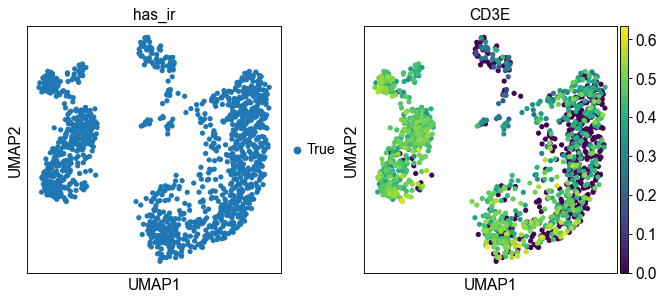

In [26]:
#UMAP 
#Here, we visualize the cells with a detected TCR on the UMAP plot. 
#It is reassuring that the TCRs coincide with the T-cell marker gene CD3.
sc.pp.log1p(tcells)
sc.pp.pca(tcells, svd_solver="arpack")
sc.pp.neighbors(tcells)
sc.tl.umap(tcells)
sc.pl.umap(tcells, color=["has_ir", "CD3E"])

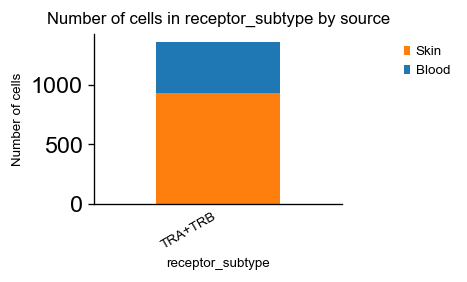

In [27]:
ax = ir.pl.group_abundance(tcells, groupby="receptor_subtype", target_col="source")

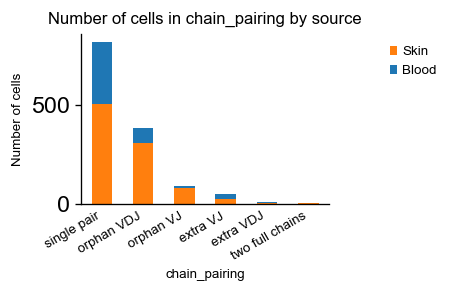

In [28]:
ax = ir.pl.group_abundance(tcells, groupby="chain_pairing", target_col="source")

In [29]:
####################################### Define clonotypes and clonotype clusters ######################

In [30]:
# using default parameters, `ir_dist` will compute nucleotide sequence identity
ir.pp.ir_dist(tcells)
ir.tl.define_clonotypes(tcells, receptor_arms="all", dual_ir="primary_only")

Computing sequence x sequence distance matrix for VJ sequences.
Computing sequence x sequence distance matrix for VDJ sequences.
Initializing lookup tables. 
Computing clonotype x clonotype distances.


  0%|          | 0/837 [00:00<?, ?it/s]

Stored clonal assignments in `adata.obs["clone_id"]`.


In [31]:
ir.tl.clonotype_network(tcells, min_cells=2)

... storing 'clone_id' as categorical


<AxesSubplot:>

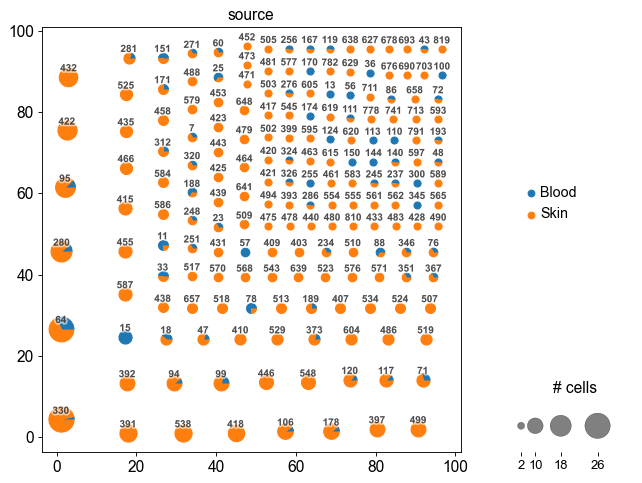

In [32]:
ir.pl.clonotype_network(
    tcells, color="source", base_size=20, label_fontsize=9, panel_size=(7, 7)
)

In [33]:
###################################### CLONAL EXPANSION ################################

In [34]:
ir.tl.clonal_expansion(tcells)

... storing 'clonal_expansion' as categorical


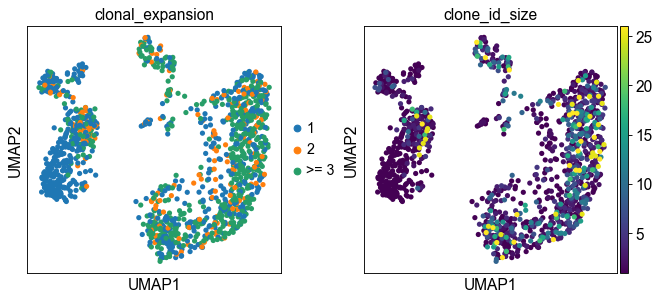

In [35]:
#Comparing repertoires
sc.pl.umap(tcells, color=["clonal_expansion", "clone_id_size"])

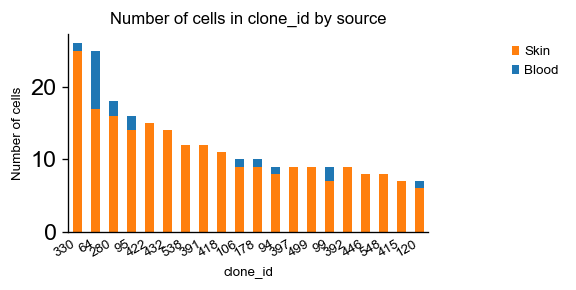

In [36]:
ax = ir.pl.group_abundance(
    tcells, groupby="clone_id", target_col="source", max_cols=20, figsize=(5, 3)
)

In [37]:
###############Repertoire simlarity and overlaps###########

c:\users\mahim\appdata\local\programs\python\python37\lib\site-packages\scirpy\_tools\_clonotype_imbalance.py:275: RuntimeWarning: divide by zero encountered in log2
  (case_mean_freq + global_minimum) / (control_mean_freq + global_minimum)
c:\users\mahim\appdata\local\programs\python\python37\lib\site-packages\scirpy\_tools\_clonotype_imbalance.py:275: RuntimeWarning: divide by zero encountered in double_scalars
  (case_mean_freq + global_minimum) / (control_mean_freq + global_minimum)


<AxesSubplot:xlabel='clone_id', ylabel='Normalized abundance'>

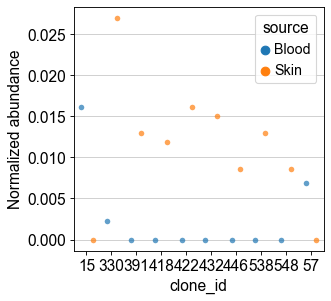

In [38]:
ir.pl.clonotype_imbalance(
    tcells,
    replicate_col="sample",
    groupby="source",
    case_label="Skin",
    control_label= "Blood",
    plot_type="strip",
)

No handles with labels found to put in legend.


<AxesSubplot:title={'center':'Volcano plot'}, xlabel='log2FoldChange', ylabel='-log10(p-value)'>

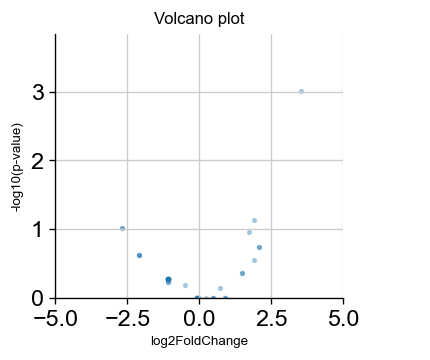

In [39]:
ir.pl.clonotype_imbalance(
    tcells,
    replicate_col="sample",
    groupby="source",
    case_label="Skin",
    plot_type="volcano",
    fig_kws={"dpi": 120},
)

In [40]:
#Clonotype imbalance
freq, stat = ir.tl.clonotype_imbalance(
    tcells,
    replicate_col="sample",
    groupby="source",
    case_label="Skin",
    control_label="Blood",
    inplace=False,
)
top_differential_clonotypes = stat["clone_id"].tolist()[:3]

c:\users\mahim\appdata\local\programs\python\python37\lib\site-packages\scirpy\_tools\_clonotype_imbalance.py:275: RuntimeWarning: divide by zero encountered in log2
  (case_mean_freq + global_minimum) / (control_mean_freq + global_minimum)
c:\users\mahim\appdata\local\programs\python\python37\lib\site-packages\scirpy\_tools\_clonotype_imbalance.py:275: RuntimeWarning: divide by zero encountered in double_scalars
  (case_mean_freq + global_minimum) / (control_mean_freq + global_minimum)


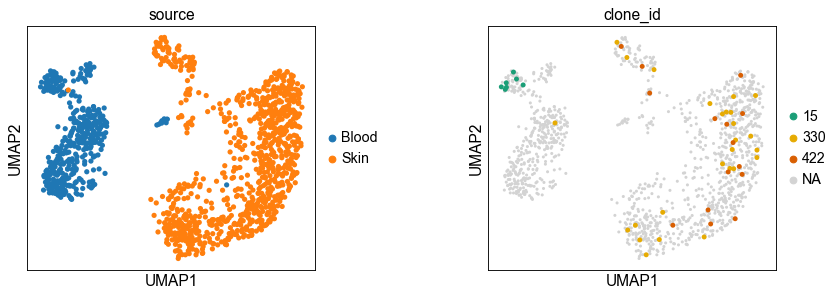

In [41]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4), gridspec_kw={"wspace": 0.6})
sc.pl.umap(tcells, color="source", ax=ax1, show=False)
sc.pl.umap(
    tcells,
    color="clone_id",
    groups=top_differential_clonotypes,
    ax=ax2,
    # increase size of highlighted dots
    size=[
        80 if c in top_differential_clonotypes else 30 for c in tcells.obs["clone_id"]
    ],
    palette=cycler(color=mpl_cm.Dark2_r.colors)
)

No handles with labels found to put in legend.


<AxesSubplot:title={'center':'Repertoire overlap between Skin and Blood'}, xlabel='Clonotype size in Skin', ylabel='Clonotype size in Blood'>

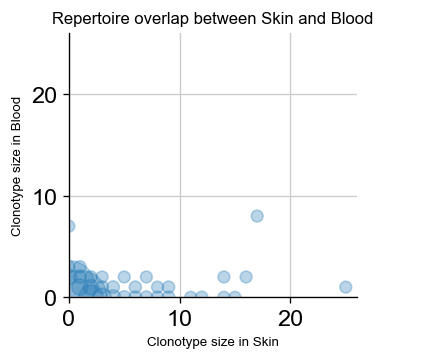

In [42]:
ir.tl.repertoire_overlap(tcells, "source")
ir.pl.repertoire_overlap(
    tcells, "source", pair_to_plot=["Skin", "Blood"], fig_kws={"dpi": 120}
)

ranking genes
    finished (0:00:01)


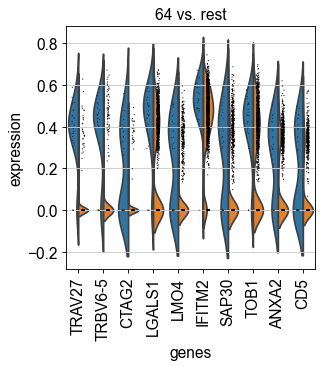

In [43]:
#Marker genes (not relevant anymore)
sc.tl.rank_genes_groups(
    tcells, "clone_id", "source", groups=["64"], method="wilcoxon"
)
sc.pl.rank_genes_groups_violin(tcells, groups="64", n_genes=10)

In [44]:
######################### Core Clone analysis ##############################

#specify clone of interest based on its clone_id
cl1 = tcells[tcells.obs['clone_id'] == '95',:]
cl1.obs['source'].value_counts()

Skin     14
Blood     2
Name: source, dtype: int64

ranking genes
Trying to set attribute `.uns` of view, copying.
    finished (0:00:00)
c:\users\mahim\appdata\local\programs\python\python37\lib\site-packages\scanpy\plotting\_tools\__init__.py:312: UserWarning: Attempting to set identical bottom == top == 2.2228758335113525 results in singular transformations; automatically expanding.
  ax.set_ylim(ymin, ymax)


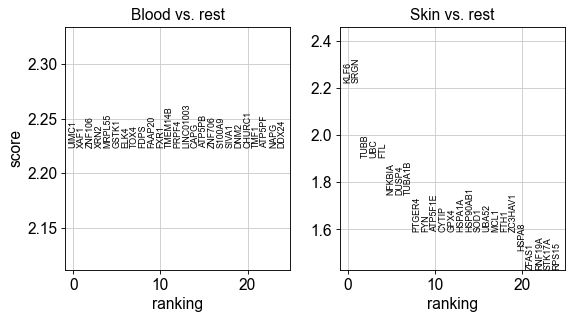

In [45]:
sc.tl.rank_genes_groups(cl1, 'source', method='wilcoxon', key_added = "wilcoxon")
sc.pl.rank_genes_groups(cl1, n_genes=25, sharey=False, key="wilcoxon")

In [46]:
#general information about tcells dataframe
tcells.obs['source'].value_counts()

Skin     929
Blood    433
Name: source, dtype: int64

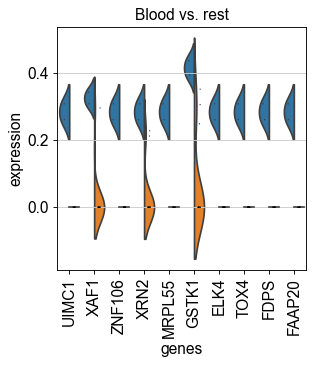

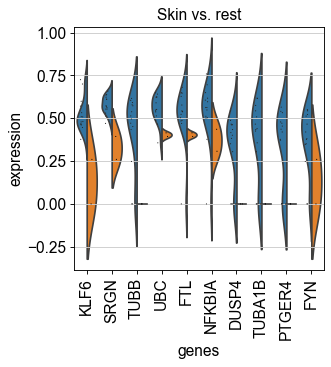

In [47]:
sc.pl.rank_genes_groups_violin(cl1, n_genes=10, key="wilcoxon")

ranking genes
    finished (0:00:01)


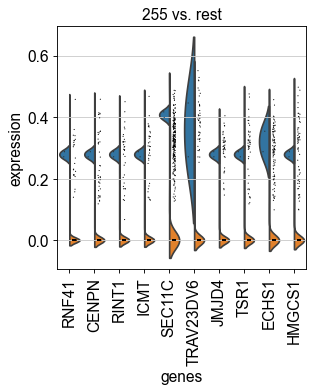

In [48]:
#Marker genes bewteen 2 clones
sc.tl.rank_genes_groups(
    tcells, "clone_id", groups=["255"], method="wilcoxon"
)
sc.pl.rank_genes_groups_violin(tcells, groups=["255"], n_genes=10)

ranking genes
    finished (0:00:00)


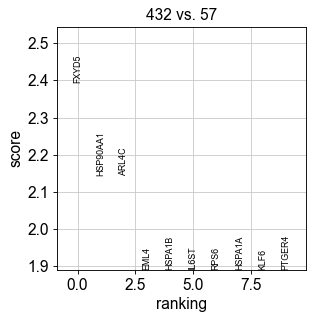

In [49]:
sc.tl.rank_genes_groups(tcells, 'clone_id', groups=['432'], reference='57', method='wilcoxon')
sc.pl.rank_genes_groups(tcells, groups=['432'], n_genes=10)

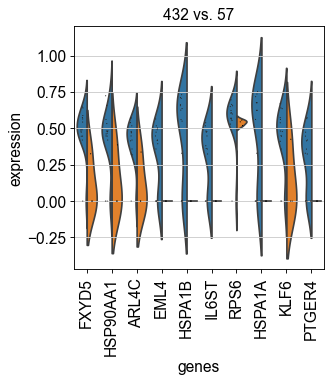

In [50]:
sc.pl.rank_genes_groups_violin(tcells, groups='432', n_genes=10)

In [51]:
###############most relevant for now ##################

In [52]:
cl1 = tcells[tcells.obs['clone_id'] == '64',:]
cl1.obs['source'].value_counts()

Skin     17
Blood     8
Name: source, dtype: int64

ranking genes
Trying to set attribute `.uns` of view, copying.
    finished (0:00:00)


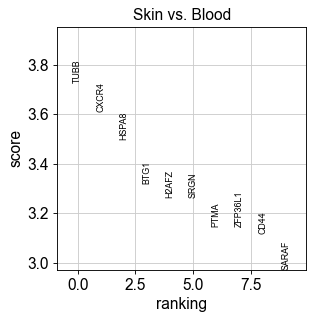

In [53]:
sc.tl.rank_genes_groups(cl1, 'source', groups=['Skin'], reference='Blood', method='wilcoxon', key_added = "wilcoxon")
sc.pl.rank_genes_groups(cl1,  groups=['Skin'], n_genes=10, sharey=False, key="wilcoxon")

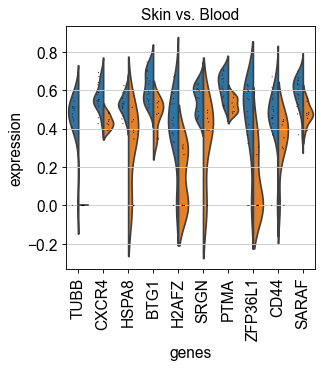

In [54]:
#violin plot
sc.pl.rank_genes_groups_violin(cl1, n_genes=10, key="wilcoxon")

In [55]:
#Comparing genes
#Take all significant DE genes for cluster0 with each test and compare the overlap.
#compare cluster1 genes, only stores top 100 by default

#wc = sc.get.rank_genes_groups_df(cl1, group='Skin', key='wilcoxon', pval_cutoff=0.01, log2fc_min=0)['names']


    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns['dendrogram_source']`
categories: Blood, Skin
var_group_labels: Skin


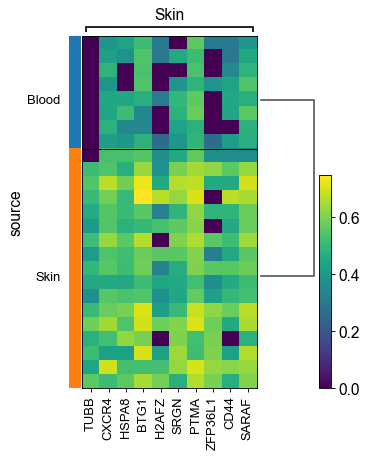

In [56]:
#heatmap
sc.pl.rank_genes_groups_heatmap(cl1, n_genes=10, key="wilcoxon", groupby="source", show_gene_labels=True)

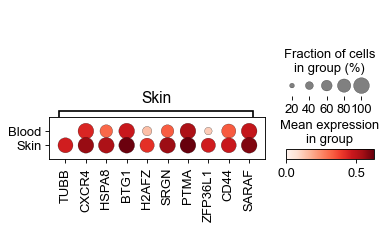

In [57]:
#dotplot
sc.pl.rank_genes_groups_dotplot(cl1, n_genes=10, key="wilcoxon", groupby="source")

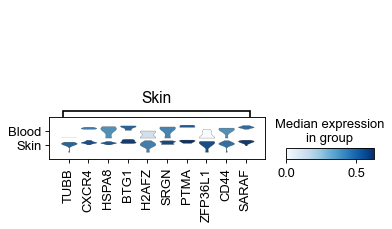

In [58]:
sc.pl.rank_genes_groups_stacked_violin(cl1, n_genes=10, key="wilcoxon", groupby="source")

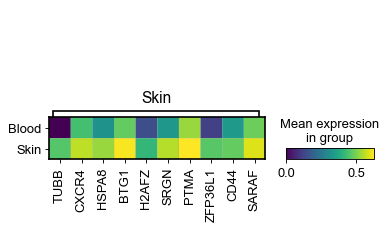

In [59]:
sc.pl.rank_genes_groups_matrixplot(cl1, n_genes=10, key="wilcoxon", groupby="source")

ranking genes
    finished (0:00:00)


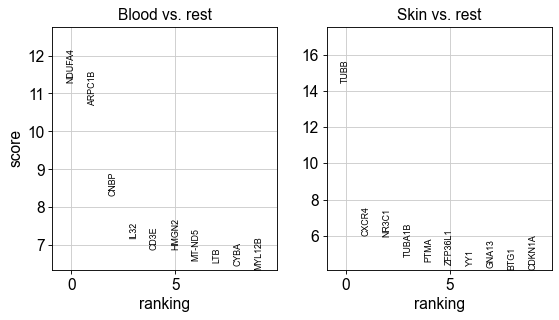

In [60]:
#t-test
sc.tl.rank_genes_groups(cl1, 'source', method='t-test', key_added = "t-test")
sc.pl.rank_genes_groups(cl1, n_genes=10, sharey=False, key = "t-test")

ranking genes
    finished (0:00:00)


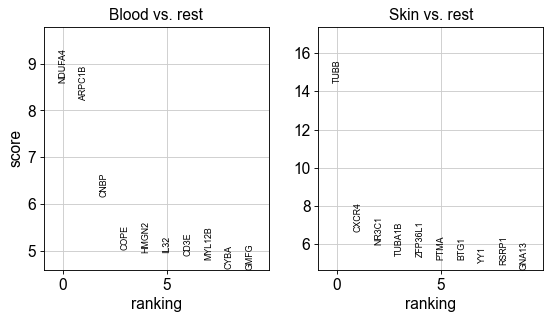

In [61]:
#t-test overestimated variance
sc.tl.rank_genes_groups(cl1, 'source', method='t-test_overestim_var', key_added = "t-test_ov")
sc.pl.rank_genes_groups(cl1, n_genes=10, sharey=False, key = "t-test_ov")

ranking genes
    finished (0:00:00)


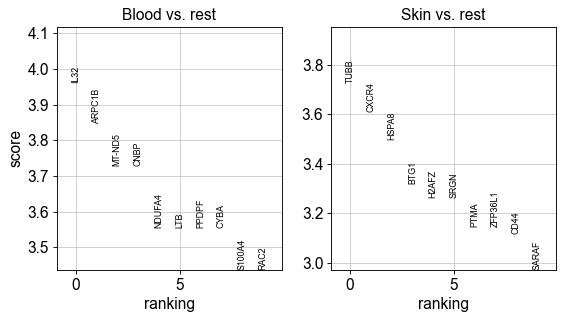

In [62]:
#Wilcoxon rank-sum 
sc.tl.rank_genes_groups(cl1, 'source', method='wilcoxon', key_added = "wilcoxon")
sc.pl.rank_genes_groups(cl1, n_genes=10, sharey=False, key="wilcoxon")

ranking genes
    finished (0:00:00)


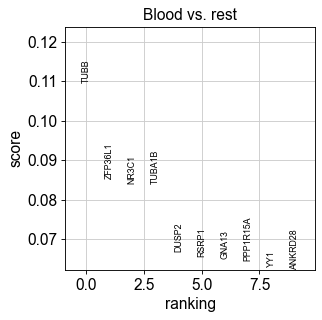

In [63]:
#logistic regression test
sc.tl.rank_genes_groups(cl1, 'source', method='logreg',key_added = "logreg")
sc.pl.rank_genes_groups(cl1, n_genes=10, sharey=False, key = "logreg")

c:\users\mahim\appdata\local\programs\python\python37\lib\site-packages\matplotlib_venn\_venn3.py:53: UserWarning: Circle A has zero area
  warnings.warn("Circle A has zero area")


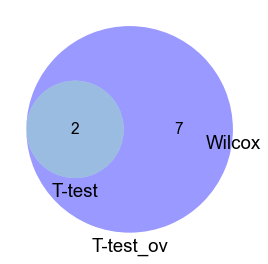

In [64]:
#compare cluster1 genes, only stores top 100 by default
#Take all significant DE genes for cluster0 with each test and compare the overlap.
#Skin

wc = sc.get.rank_genes_groups_df(cl1, group='Skin', key='wilcoxon', pval_cutoff=0.01, log2fc_min=0)['names']
tt = sc.get.rank_genes_groups_df(cl1, group='Skin', key='t-test', pval_cutoff=0.01, log2fc_min=0)['names']
tt_ov = sc.get.rank_genes_groups_df(cl1, group='Skin', key='t-test_ov', pval_cutoff=0.01, log2fc_min=0)['names']

from matplotlib_venn import venn3

venn3([set(wc),set(tt),set(tt_ov)], ('Wilcox','T-test','T-test_ov') )
plt.show()

In [65]:
ir.pp.ir_dist(
    tcells,
    metric="alignment",
    sequence="aa",
    cutoff=15,
)

ir.tl.define_clonotype_clusters(
    tcells, sequence="aa", metric="alignment", receptor_arms="all", dual_ir="any"
)

Computing sequence x sequence distance matrix for VJ sequences.


  0%|          | 0/78 [00:00<?, ?it/s]

Computing sequence x sequence distance matrix for VDJ sequences.


  0%|          | 0/105 [00:00<?, ?it/s]

Initializing lookup tables. 
Computing clonotype x clonotype distances.


  0%|          | 0/852 [00:00<?, ?it/s]

Stored clonal assignments in `adata.obs["cc_aa_alignment"]`.


In [66]:
#tcells.obs.loc[tcells.obs["cc_aa_alignment"] == "64", :]
tcells.obs.loc[tcells.obs["cc_aa_alignment"] == "64", :].groupby(
    [
        "IR_VJ_1_junction_aa",
        "IR_VJ_2_junction_aa",
        "IR_VDJ_1_junction_aa",
        "IR_VDJ_2_junction_aa",
        "receptor_subtype",
    ],
    observed=True,
).size().reset_index(name="n_cells")

,IR_VJ_1_junction_aa,IR_VJ_2_junction_aa,IR_VDJ_1_junction_aa,IR_VDJ_2_junction_aa,receptor_subtype,n_cells


In [89]:
cl1 = tcells[tcells.obs['clone_id'] == '418',:]
cl1.obs['IR_VDJ_1_junction_aa']

AAGGCAGAGGTGTTAA-1-1    CASSRETERETQYF
AGATTGCAGTTCGCAT-1-1    CASSRETERETQYF
AGCGTATTCACCTCGT-1-1    CASSRETERETQYF
CCCAATCTCTGTCTAT-1-1    CASSRETERETQYF
CCTAGCTAGCACCGCT-1-1    CASSRETERETQYF
CCTCTGACATTGTGCA-1-1    CASSRETERETQYF
CGAGCACTCACTTATC-1-1    CASSRETERETQYF
GCTCCTACATACAGCT-1-1    CASSRETERETQYF
GGTGAAGAGCTTCGCG-1-1    CASSRETERETQYF
GTCACGGCACTGCCAG-1-1    CASSRETERETQYF
TCATTACCATGGAATA-1-1    CASSRETERETQYF
Name: IR_VDJ_1_junction_aa, dtype: category
Categories (1, object): ['CASSRETERETQYF']

In [72]:
cl1 = tcells[tcells.obs['clone_id'] == '33',:]
cl1.obs['IR_VJ_1_junction_aa']

ACTGAGTCAGACGCAA-1-0    CARSNNNAGNMLTF
CATATTCTCTGGTATG-1-0    CARSNNNAGNMLTF
CGTTCTGCAGGAATCG-1-1    CARSNNNAGNMLTF
GTAACTGAGTGTCCAT-1-1    CARSNNNAGNMLTF
Name: IR_VJ_1_junction_aa, dtype: category
Categories (1, object): ['CARSNNNAGNMLTF']

In [69]:
####################### write tcells to file ######################
###(not working for some reason) ################
#tcells.write("allo-blood-skin-merged.h5ad")
#tcells.write_h5ad('./Results/tcells-results-scanpy.h5ad')
#adata.var.dtypes